<a href="https://colab.research.google.com/github/sivakrishna648/sivakrishna648.github.io/blob/main/simpleFeatureImportanceTechnique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Load Iris dataset
iris = load_iris()
X = iris.data  # Features: Sepal Length, Sepal Width, Petal Length, Petal Width
y = iris.target  # Labels: Setosa, Versicolor, Virginica

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)  # Train the model

DecisionTreeClassifier(max_depth=3, random_state=42)

In [3]:
# Predictions and accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 1.00


In [4]:
# Explain the decision tree
tree_rules = export_text(clf, feature_names=iris.feature_names)
print("\nDecision Tree Rules:\n")
print(tree_rules)


Decision Tree Rules:

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.60
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.60
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- class: 2



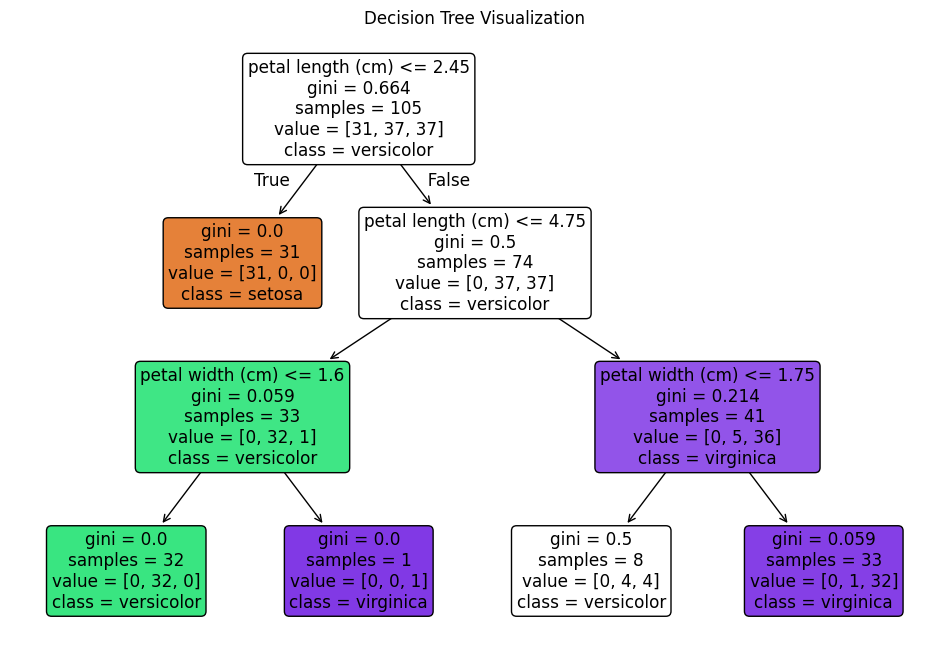

In [5]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

In [6]:
# Feature Importance
importance = clf.feature_importances_
for i, feature in enumerate(iris.feature_names):
    print(f"Feature: {feature}, Importance: {importance[i]:.2f}")

Feature: sepal length (cm), Importance: 0.00
Feature: sepal width (cm), Importance: 0.00
Feature: petal length (cm), Importance: 0.93
Feature: petal width (cm), Importance: 0.07


In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [8]:
# Generate synthetic dataset
data = {
    "Gender": ["Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female"],
    "Education_Level": [1, 2, 3, 3, 2, 2, 1, 3],
    "Experience_Years": [5, 7, 6, 8, 4, 10, 3, 6],
    "Hired": [1, 0, 1, 0, 1, 0, 1, 0]  # 1 = Hired, 0 = Not Hired
}

df = pd.DataFrame(data)

# Encode categorical variables (e.g., Gender)
label_encoder = LabelEncoder()
df["Gender_Encoded"] = label_encoder.fit_transform(df["Gender"])  # Male: 1, Female: 0

# Define features and target
X = df[["Gender_Encoded", "Education_Level", "Experience_Years"]]
y = df["Hired"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
# Display the decision rules
tree_rules = export_text(tree, feature_names=list(X.columns))
print("Decision Tree Rules:")
print(tree_rules)

# Predictions and Evaluation
y_pred = tree.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Decision Tree Rules:
|--- Gender_Encoded <= 0.50
|   |--- class: 0
|--- Gender_Encoded >  0.50
|   |--- class: 1


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [11]:
X

,Gender_Encoded,Education_Level,Experience_Years
0,1,1,5
1,0,2,7
2,1,3,6
3,0,3,8
4,1,2,4
5,0,2,10
6,1,1,3
7,0,3,6


In [12]:
# Analyze gender-based predictions
gender_bias_analysis = pd.DataFrame({
    "Gender": X_test["Gender_Encoded"].map({1: "Male", 0: "Female"}),  # Reverse encoding
    "Actual": y_test,
    "Predicted": y_pred
})
print("\nBias Analysis:")
print(gender_bias_analysis.groupby("Gender").mean())


Bias Analysis:
        Actual  Predicted
Gender                   
Female     0.0        0.0
Male       1.0        1.0


In [13]:
gender_bias_analysis

,Gender,Actual,Predicted
1,Female,0,0
5,Female,0,0
0,Male,1,1


In [14]:
# Mitigating Gender Bias: Drop Gender Feature
X_train_no_gender = X_train.drop(columns=["Gender_Encoded"])
X_test_no_gender = X_test.drop(columns=["Gender_Encoded"])

In [15]:
# Retrain Decision Tree without Gender
tree_no_gender = DecisionTreeClassifier(random_state=42)
tree_no_gender.fit(X_train_no_gender, y_train)

DecisionTreeClassifier(random_state=42)

In [16]:
# Predictions and Evaluation without Gender
y_pred_no_gender = tree_no_gender.predict(X_test_no_gender)
print("\nAccuracy (No Gender):", accuracy_score(y_test, y_pred_no_gender))
print("\nClassification Report (No Gender):")
print(classification_report(y_test, y_pred_no_gender))


Accuracy (No Gender): 0.3333333333333333

Classification Report (No Gender):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
# Compare Rules Without Gender
tree_rules_no_gender = export_text(tree_no_gender, feature_names=list(X_train_no_gender.columns))
print("\nDecision Tree Rules (No Gender):")
print(tree_rules_no_gender)


Decision Tree Rules (No Gender):
|--- Education_Level <= 2.50
|   |--- class: 1
|--- Education_Level >  2.50
|   |--- Experience_Years <= 7.00
|   |   |--- class: 0
|   |--- Experience_Years >  7.00
|   |   |--- class: 0

